In [35]:

"""%reset -f
import numpy as np
class GWSystem:
    """
    Made by doyeul from Korea & Eawha university
    Please provide only one of the parameters: a,fgw,Tkep, using ***km,Hz,or ms*** respectively
    
    This code assumes that m1= m2 = 35 solar mass
    Inside the code, quantities are in geometrized units (G = c = 1), with mass measured in solar masses.
    You don't need to worry about it! Easy to use!
    """
    def __init__(self,*,a=None,f=None,T=None):   #*는 순서입력x, 키워드 입력만 받음. None 은 데이터 없음. fgw, Tkep
        inputs = [a,f,T]
        count = sum(x is not None for x in inputs)   
        if count!=1:
            raise ValueError("please insert only one input among a,f,T")
        #define value
        m1=35
        m2=35
        M=m1+m2
        G=1
        c=1    
        G_c2=1.477  # G_c2=1.477km/M0
        G_c3=4.926e-3 # G_c3=4.926e-3ms/M0
        if a is not None:
            a_geo=a/G_c2
            T_geo=2*np.pi*np.sqrt(a_geo**3/G/M)
            f_geo=2/T_geo
        elif f is not None:
            f_geo=f*G_c3*1e-3   
            T_geo=2/f_geo    
            a_geo=np.cbrt(G*M*T_geo**2/4/np.pi**2)
        elif T is not None:
            T_geo=T/G_c3
            f_geo=2/T_geo
            a_geo=np.cbrt(G*M*T_geo**2/4/np.pi**2)
        self.a = a_geo * G_c2   #km
        self.f = f_geo/G_c3 /1e-3  #Hz   
        self.T=T_geo*G_c3    #ms
        """

In [2]:
%reset -f
import numpy as np
class GWSystem:
    """
    Made by doyeul from Korea & Eawha university
    Please provide only one of the parameters: a,fgw,Tkep,m1,m2 using ***km,Hz,s or solar mass*** respectively
    here we use solar mass as the unit of mass
    """
    def __init__(self,*,a=None,f=None,T=None,m1=35.0,m2=35.0):    #*는 순서입력x, 키워드 입력만 받음. None 은 데이터 없음. fgw, Tkep
        inputs = [a,f,T]
        count = sum(x is not None for x in inputs)   
        if count!=1:
            raise ValueError("please insert only one input among a,f,T")
        #define value
        G=6.67428e-11 #Gravitational constant in mks unit system
        c=2.99792458e8 #speed of light in mks unit system
        M0=1.9891e30 #solar mass in mks unit system
        #mass of the star1 in solar mass   ,type=float64=double->significant figure~15
        #mass of the star2 in solar mass
        M=m1+m2   #total mass
        M_mks=M*M0
        if a is not None:
            a_mks=a*1000
            T_mks=2*np.pi*np.sqrt(a_mks**3/G/M_mks)
            f_mks=2/T_mks
        elif f is not None:
            f_mks=f 
            T_mks=2/f_mks
            a_mks=np.cbrt(G*M_mks*T_mks**2/4/np.pi**2)
        elif T is not None:
            T_mks=T
            f_mks=2/T_mks
            a_mks=np.cbrt(G*M_mks*T_mks**2/4/np.pi**2)
        self.a=a_mks*1e-3  #semi-major axis in km
        self.f=f_mks       #fgw in Hz
        self.T=T_mks       #Tkep in s
        

    

In [16]:
print(GWSystem.__doc__)


Made by doyeul from Korea & Eawha university
Please provide only one of the parameters: a,fgw,Tkep, using ***km,Hz,or s*** respectively
here we use solar mass as the unit of mass



In [17]:
s=GWSystem(a=350.)    #m1,m2에서 유효숫자 병목이 3자리로 생김.
print("a={0:.2e}km fgw={1:.2e}Hz Tkep={2:.2e}s".format(s.a,s.f,s.T))

a=3.50e+02km fgw=5.82e+01Hz Tkep=3.44e-02s


In [18]:
s=GWSystem(f=148.)   #isco frequency
print("a={0:.2e}km fgw={1:.2e}Hz Tkep={2:.2e}s".format(s.a,s.f,s.T))

a=1.88e+02km fgw=1.48e+02Hz Tkep=1.35e-02s


In [10]:
s=GWSystem(T=0.0135)
print("a={0:.2e}km fgw={1:.2e}Hz Tkep={2:.2e}s".format(s.a,s.f,s.T))

a=3.50e+02km fgw=1.48e+02Hz Tkep=1.35e-02s


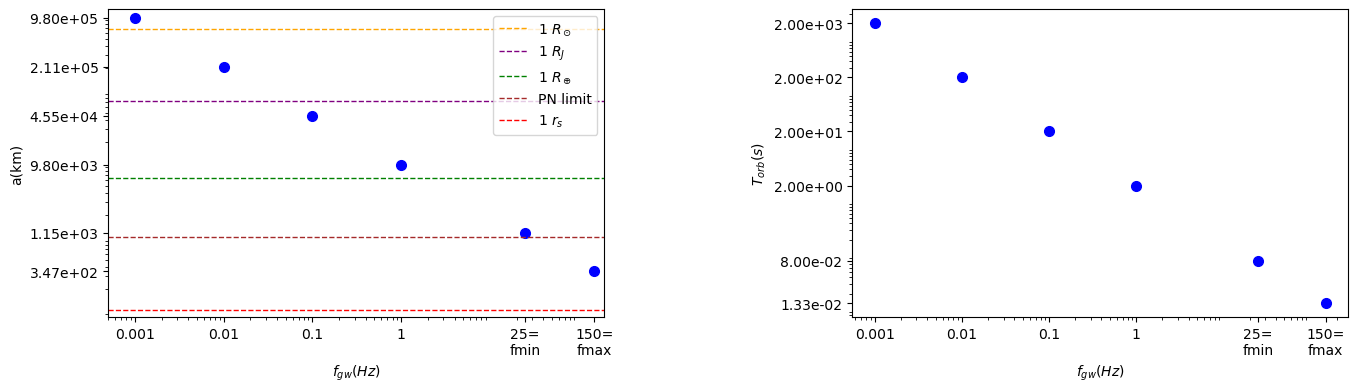

In [35]:
#GW150914 m1,m2=35,35, fmin=25, fmax~fisco=150
import numpy as np
import matplotlib.pyplot as plt
#trigger of GW
m1=35.0
m2=35.0
fmin=25.0
fmax=150.
#physical constant
R0_km = 6.95508e+5 # 태양 반지름
rs_km=2.95*m1   #m1>=m2 convention schwarzschild radius
PN_limit=10*rs_km  #PN 근사가능한 경계
Rearth_km=6371 # 지구 반지름
RJ_km=71500  #목성반지름
second=1  #
minute=60
hour=3600
solar day=86400
Sidear_year=3.15581450e7 

#fill the list to plot, using GWSystem class
flist=[0.001,0.01,0.1,1,fmin,fmax]
alist=[]
Tlist=[]
for i in flist:
    s=GWSystem(f=i,m1=m1,m2=m1)
    alist.append(s.a)
for i in flist:
    s=GWSystem(f=i)
    Tlist.append(s.T)
#make list for x,y ticks' labels
fticks=[0.001,0.01,0.1,1,25,150]
aticks=[]
Tticks=[]
for i in fticks:
    s=GWSystem(f=i,m1=m1,m2=m2)
    aticks.append(s.a)
    Tticks.append(s.T)

#make figure
plt.rc('text', usetex=False) # matplotlib 내장 latex이용.
fig=plt.figure(figsize=(16,4)) #가로,세로 크기.
 #pad 크기 키워서 subplot 띄워놓기.(tight는 auto로 어느정도 맞춰주는기능)
plt.subplots_adjust(wspace=0.5) #가로간격 띄우기
#make subplot1 : a-f 
ax1=fig.add_subplot(121)
ax1.plot(flist,alist,linestyle='None',marker='o',markersize=7,c='b')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$f_{gw}(Hz)$')
ax1.set_ylabel('a(km)')
ax1.set_xlim(0.0005,max(fticks)*1.3)
ax1.set_ylim(rs_km*0.8,max(aticks)*1.3)
#subplot1's x,y축 tick 라벨 생성
ax1.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','25=\nfmin','150=\nfmax']
ax1.set_xticklabels(xtick_labels,fontsize=10)
ax1.set_yticks(aticks)
ytick_labels=['{:.2e}'.format(k) for k in aticks]
ax1.set_yticklabels(ytick_labels,fontsize=10)
ax1.grid(False) #자동 그리드 = 라벨에 다 붙음. 끄기
#subplot1's 수평참조선
ax1.axhline(y=R0_km, color='orange', linestyle='--', linewidth=1, label='1 $R_\\odot$')  #수평 참조선
ax1.axhline(y=RJ_km, color='purple', linestyle='--', linewidth=1, label='1 $R_J$')  
ax1.axhline(y=Rearth_km, color='green', linestyle='--', linewidth=1, label=r'1 $R_\oplus$')  
ax1.axhline(y=PN_limit, color='brown', linestyle='--', linewidth=1, label=r'PN limit')  
ax1.axhline(y=rs_km, color='red', linestyle='--', linewidth=1, label='1 $r_s$') 



# 범례 추가
ax1.legend(loc='upper right')  #label 이 지정된 데이터요소 띄워줌.

#make subplot : T-f
ax2=fig.add_subplot(122)
ax2.plot(flist,Tlist,linestyle='None',marker='o',markersize=7,c='b')
ax2.set_xlabel(r'$f_{gw}(Hz)$')
ax2.set_ylabel(r'$T_{orb}(s)$')
ax2.set_xscale('log')
ax2.set_yscale('log')
#subplot2's 라벨 생성
ax2.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','25=\nfmin','150=\nfmax']
ax2.set_xticklabels(xtick_labels,fontsize=10)
ax2.set_yticks(Tticks)
ytick_labels=['{:.2e}'.format(k) for k in Tticks]
ax2.set_yticklabels(ytick_labels,fontsize=10)
ax2.grid(False)   #자동 그리드 = 라벨에 다 붙음. 끄기




plt.show()


In [10]:
plt.

Signature: plt.legend(*args, **kwargs) -> 'Legend'
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for a

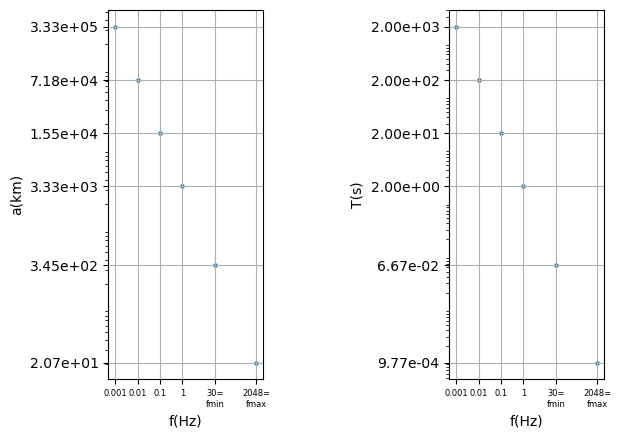

In [14]:
"""#GW170817 m1,m2=1.48,1.27, fmin=30, fmax~fisco=2048
import numpy as np
import matplotlib.pyplot as plt
#fobs : [10,300], 10 Hz 보다 작아도 감지는 못하지만 중력파는 존재.
flist=[0.001,0.01,0.1,1,30,2048]
alist=[]
Tlist=[]
for i in flist:
    s=GWSystem(f=i)
    alist.append(s.a)
for i in flist:
    s=GWSystem(f=i)
    Tlist.append(s.T)
#for grid
fticks=[0.001,0.01,0.1,1,30,2048]
aticks=[]
Tticks=[]
for i in fticks:
    s=GWSystem(f=i)
    aticks.append(s.a)
for i in fticks:
    s=GWSystem(f=i)
    Tticks.append(s.T)

#make figure
fig=plt.figure()
fig.tight_layout(pad=2.0)  #pad 크기 키워서 subplot 띄워놓기.
plt.subplots_adjust(wspace=1.2) #가로간격 띄우기
#make subplot1 : a-f 
ax1=fig.add_subplot(121)
ax1.scatter(flist,alist,s=5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('f(Hz)')
ax1.set_ylabel('a(km)')
#subplot1's grid 생성
ax1.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','30=\nfmin','2048=\nfmax']
ax1.set_xticklabels(xtick_labels,fontsize=6)
ax1.set_yticks(aticks)
ytick_labels=['{:.2e}'.format(k) for k in aticks]
ax1.set_yticklabels(ytick_labels,fontsize=10)
ax1.grid()

#make subplot : T-f
ax2=fig.add_subplot(122)
ax2.scatter(flist,Tlist,s=5)
ax2.set_xlabel('f(Hz)')
ax2.set_ylabel('T(s)')
ax2.set_xscale('log')
ax2.set_yscale('log')
#subplot2's grid 생성
ax2.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','30=\nfmin','2048=\nfmax']
ax2.set_xticklabels(xtick_labels,fontsize=6)
ax2.set_yticks(Tticks)
ytick_labels=['{:.2e}'.format(k) for k in Tticks]
ax2.set_yticklabels(ytick_labels,fontsize=10)
ax2.grid()




plt.show()


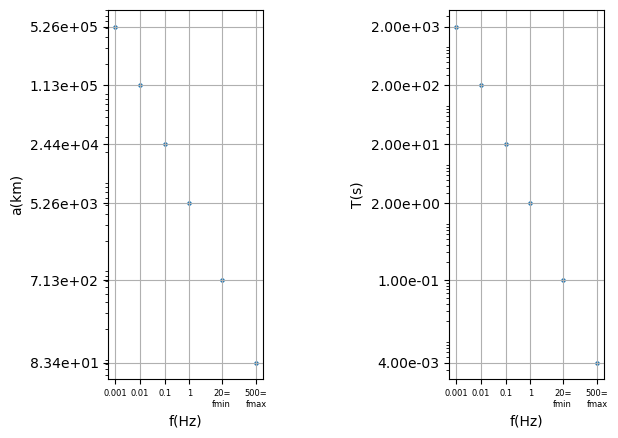

In [19]:
"""#GW150914 m1,m2=8.9, 1.9, fmin=20, fmax~fisco~500
import numpy as np
import matplotlib.pyplot as plt
#fobs : [10,300], 10 Hz 보다 작아도 감지는 못하지만 중력파는 존재.
flist=[0.001,0.01,0.1,1,20,500]
alist=[]
Tlist=[]
for i in flist:
    s=GWSystem(f=i)
    alist.append(s.a)
for i in flist:
    s=GWSystem(f=i)
    Tlist.append(s.T)
#for grid
fticks=[0.001,0.01,0.1,1,20,500]
aticks=[]
Tticks=[]
for i in fticks:
    s=GWSystem(f=i)
    aticks.append(s.a)
for i in fticks:
    s=GWSystem(f=i)
    Tticks.append(s.T)

#make figure
fig=plt.figure()
fig.tight_layout(pad=2.0)  #pad 크기 키워서 subplot 띄워놓기.
plt.subplots_adjust(wspace=1.2) #가로간격 띄우기
#make subplot1 : a-f 
ax1=fig.add_subplot(121)
ax1.scatter(flist,alist,s=5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('f(Hz)')
ax1.set_ylabel('a(km)')
#subplot1's grid 생성
ax1.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','20=\nfmin','500=\nfmax']
ax1.set_xticklabels(xtick_labels,fontsize=6)
ax1.set_yticks(aticks)
ytick_labels=['{:.2e}'.format(k) for k in aticks]
ax1.set_yticklabels(ytick_labels,fontsize=10)
ax1.grid()

#make subplot : T-f
ax2=fig.add_subplot(122)
ax2.scatter(flist,Tlist,s=5)
ax2.set_xlabel('f(Hz)')
ax2.set_ylabel('T(s)')
ax2.set_xscale('log')
ax2.set_yscale('log')
#subplot2's grid 생성
ax2.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','20=\nfmin','500=\nfmax']
ax2.set_xticklabels(xtick_labels,fontsize=6)
ax2.set_yticks(Tticks)
ytick_labels=['{:.2e}'.format(k) for k in Tticks]
ax2.set_yticklabels(ytick_labels,fontsize=10)
ax2.grid()




plt.show()
